In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Font styling 
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

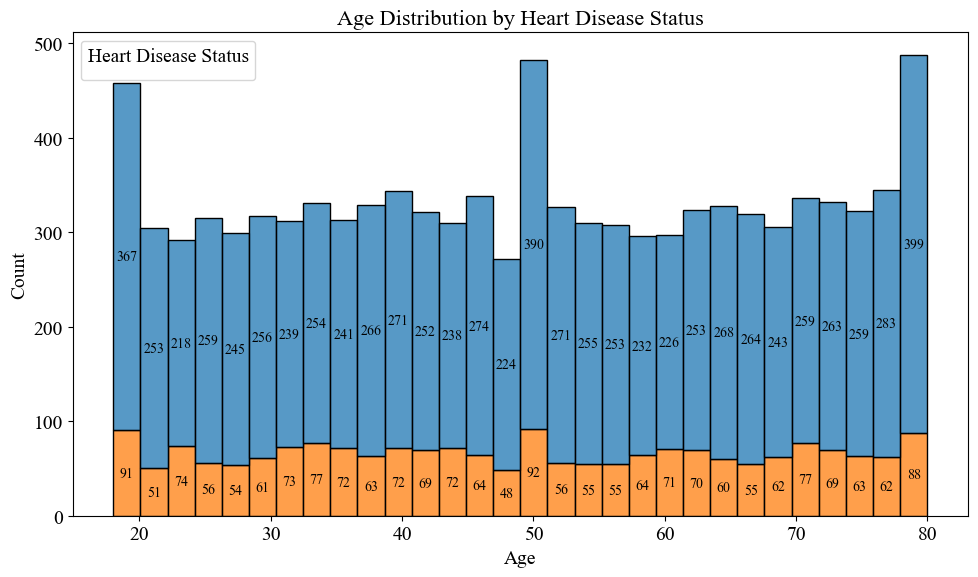

In [24]:
# Clean data for histogram
df_clean = df[['Age', 'Heart Disease Status']].dropna()

# Create histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_clean, x='Age', hue='Heart Disease Status', multiple='stack', kde=False, bins=30)

# Titles and labels
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease Status', fontsize=12)
plt.grid(False)
plt.tight_layout()

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10)

plt.show()


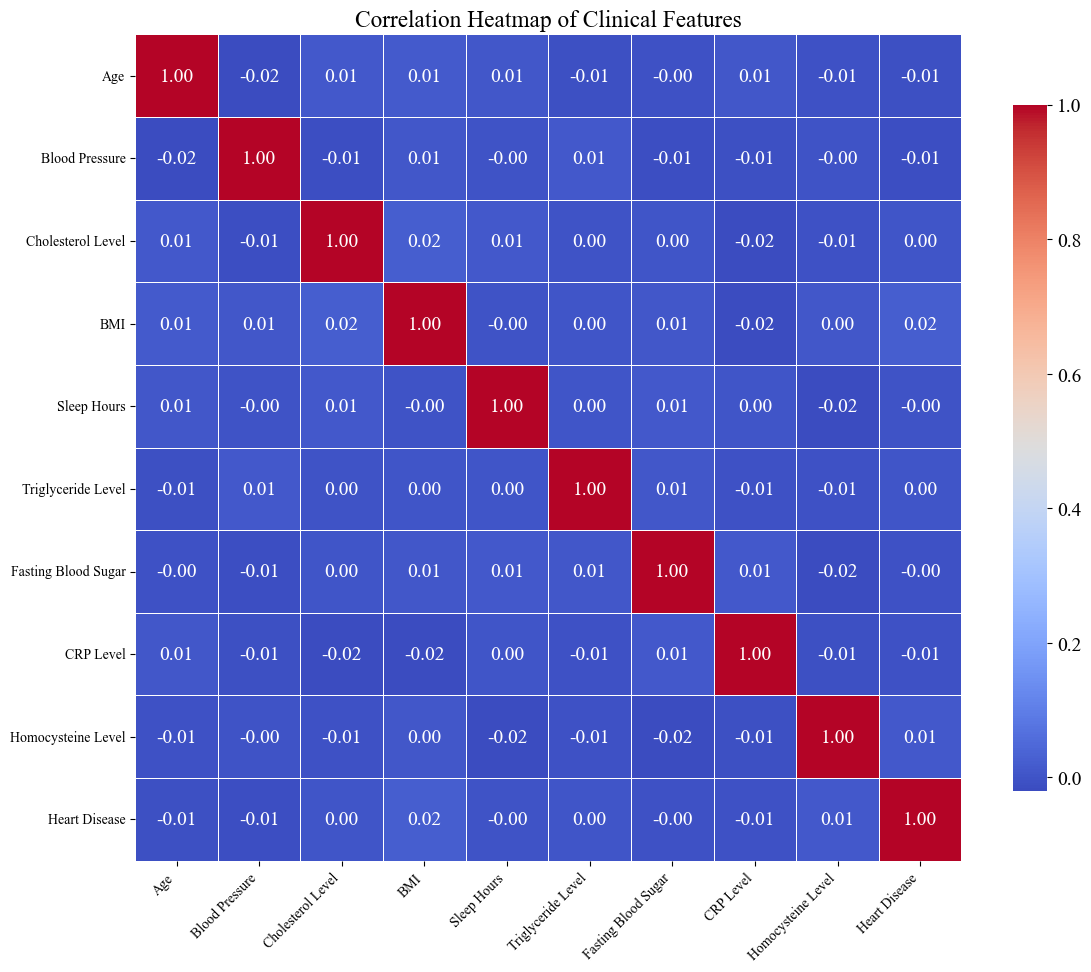

In [21]:
# Prepare numeric data and derive binary target
df_numeric = df.select_dtypes(include=['float64']).copy()
df_numeric['Heart Disease'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

# Drop missing values
df_corr = df_numeric.dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)

# Title and formatting
plt.title('Correlation Heatmap of Clinical Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
